In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Viral_Social_Media_Trends.csv')

In [4]:
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [5]:
df.shape

(5000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [7]:
df.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [8]:
df.isnull().sum()

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop('Post_ID', axis = 1)

In [11]:
numerical_cols = df.select_dtypes(include = 'int64')
for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in {col}: {len(outliers)}')

Outliers in Views: 0
Outliers in Likes: 0
Outliers in Shares: 0
Outliers in Comments: 0


Visualization

Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64


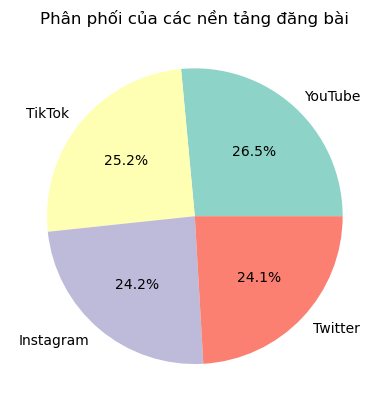

In [12]:
# Tỉ lệ nền tảng được sử dụng 
Platform_counts = df['Platform'].value_counts()
print(Platform_counts)

colors = sns.color_palette("Set3")[:4] 
plt.pie(Platform_counts, labels = Platform_counts.index, autopct = '%1.1f%%', colors = colors)
plt.title('Phân phối của các nền tảng đăng bài')
plt.show()

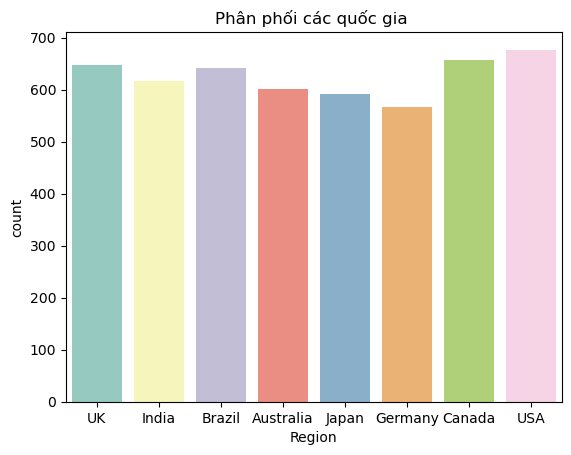

In [13]:
# Số lượng bài đăng theo quốc gia
sns.countplot(data = df, x = 'Region', hue = 'Region', palette = 'Set3' )
plt.title('Phân phối các quốc gia ')
plt.show()

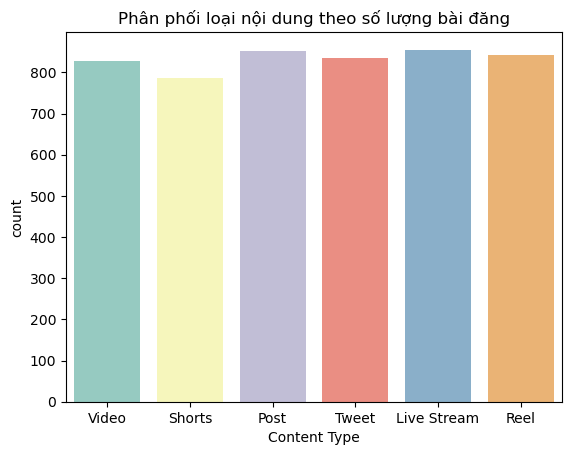

In [14]:
# Số lượng bài đăng dựa theo loại content
sns.countplot(data = df, x = 'Content_Type', hue = 'Content_Type', palette = 'Set3')
plt.xlabel('Content Type')
plt.title('Phân phối loại nội dung theo số lượng bài đăng')
plt.show()

Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: count, dtype: int64


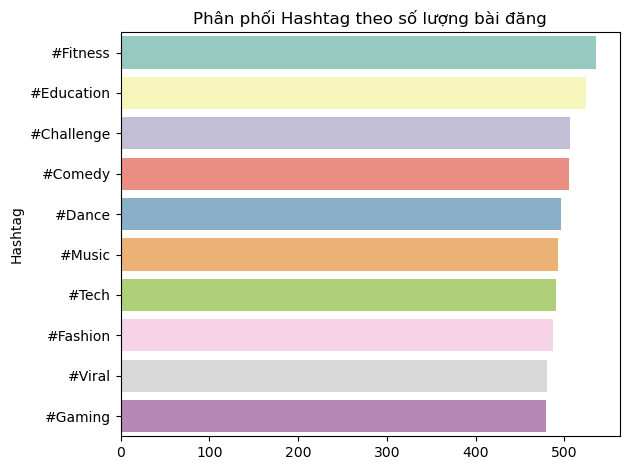

In [15]:
# Số lượng bài đăng dựa theo Hashtag
Hashtag_counts = df['Hashtag'].value_counts()
print(Hashtag_counts)

sns.barplot( x = Hashtag_counts.values, y = Hashtag_counts.index, hue = Hashtag_counts.index, palette = 'Set3', legend = False)
plt.title('Phân phối Hashtag theo số lượng bài đăng')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Nền tảng phổ biến nhất ở mỗi quốc gia')

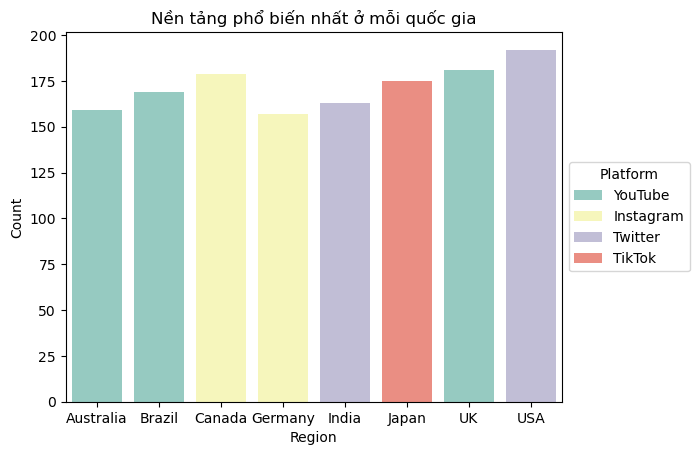

In [16]:
# Các nền tảng đăng bài phổ biến nhất ở các quốc gia
Region_Platform = df.groupby(['Platform', 'Region'], observed = False).size()
df_Region_Platform = Region_Platform.reset_index(name = 'Count')
Most_popular_platform = df_Region_Platform.sort_values('Count', ascending=False).groupby('Region').first()

sns.barplot(data = Most_popular_platform, x = 'Region', y ='Count', hue = 'Platform', palette = 'Set3')
plt.legend(title = 'Platform', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Nền tảng phổ biến nhất ở mỗi quốc gia')

Text(0.5, 1.0, 'Phân phối nội dung trên các nền tảng')

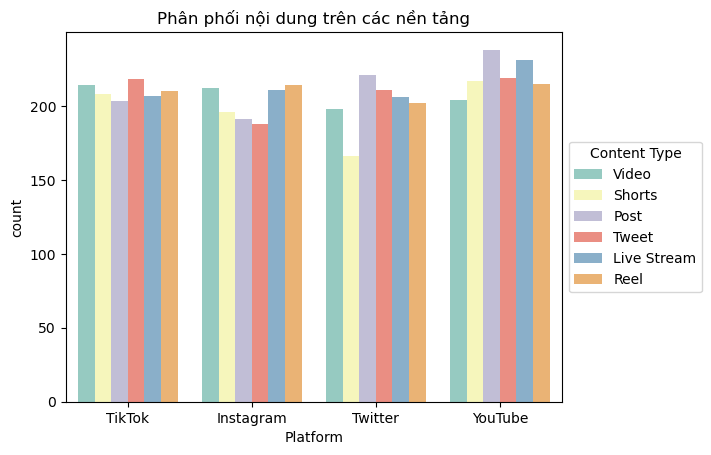

In [17]:
# Loại content phổ biến ở các nền tảng
sns.countplot(data = df, hue = 'Content_Type', x = 'Platform', palette = 'Set3')
plt.legend(title = 'Content Type', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Phân phối nội dung trên các nền tảng')

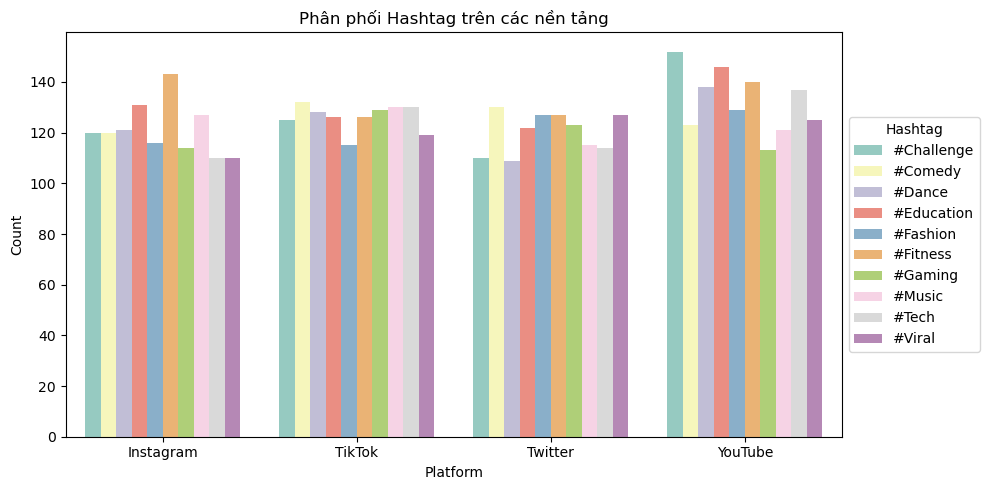

In [18]:
# Hashtag phổ biến ở các nền tảng
Platform_Hashtag = df.groupby(['Platform', 'Hashtag'], observed = False).size().reset_index(name = 'Count')
Platform_Hashtag 
plt.figure(figsize = (10,5))
sns.barplot(data = Platform_Hashtag, hue = 'Hashtag', y = 'Count', x = 'Platform', palette = 'Set3')
plt.legend(title = 'Hashtag', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Phân phối Hashtag trên các nền tảng')
plt.tight_layout()

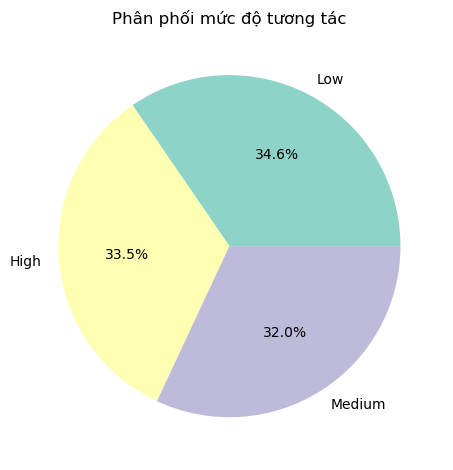

In [19]:
# Phân phối của mức độ tương tác
Engagement_Level_counts = df['Engagement_Level'].value_counts()
colors = sns.color_palette("Set3")[:4] 
plt.pie(Engagement_Level_counts, labels = Engagement_Level_counts.index, autopct = '%1.1f%%', colors = colors)
plt.title('Phân phối mức độ tương tác')
plt.tight_layout()
plt.show()

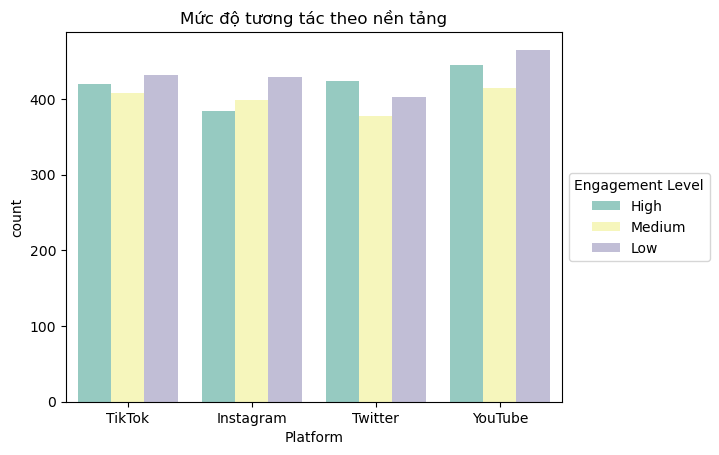

In [20]:
# Phân phối của mức độ tương tác dựa trên nền tảng
sns.countplot(data = df, x = 'Platform', hue = 'Engagement_Level', palette = 'Set3')
plt.legend(title = 'Engagement Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Mức độ tương tác theo nền tảng')
plt.show()

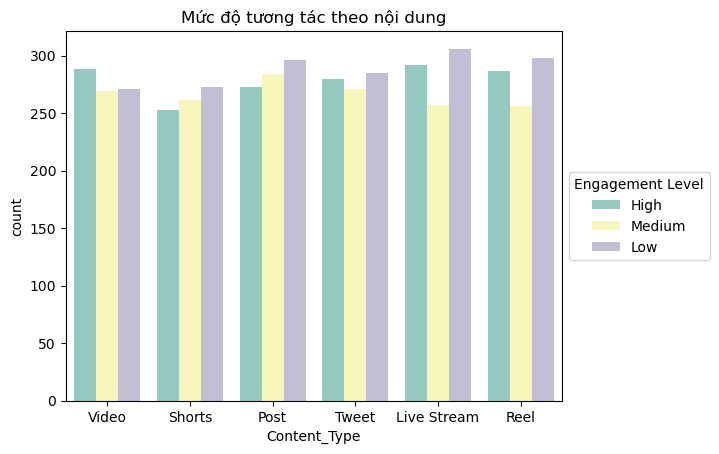

In [21]:
# Phân phối của mức độ tương tác dựa trên loại content
sns.countplot(data = df, x = 'Content_Type', hue = 'Engagement_Level', palette = 'Set3')
plt.legend(title = 'Engagement Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Mức độ tương tác theo nội dung')
plt.show()

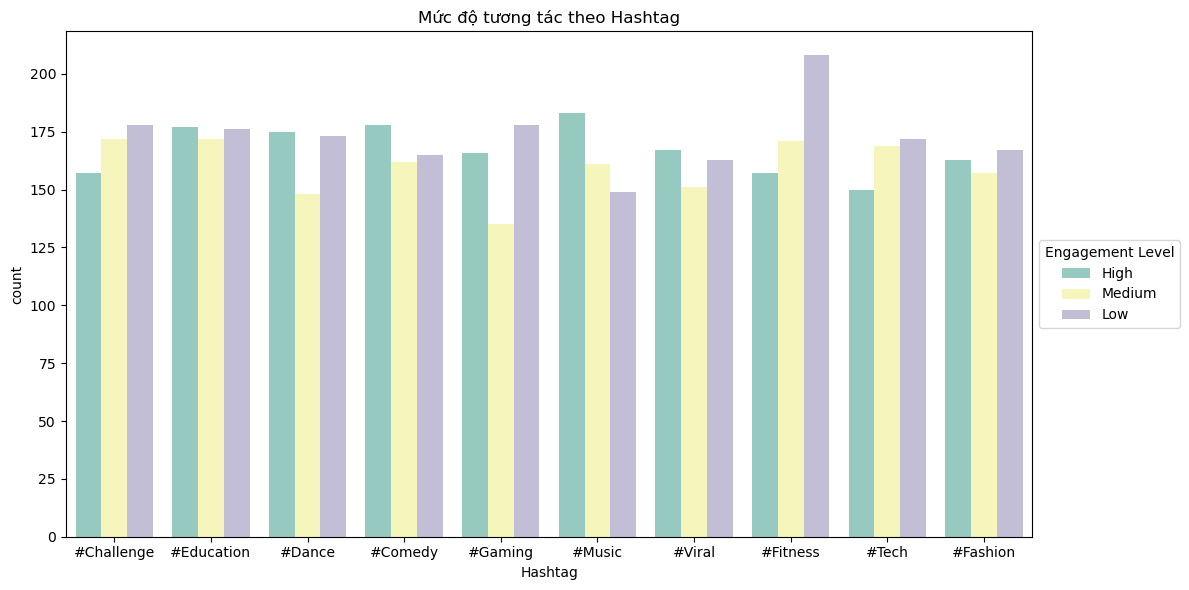

In [22]:
# Phân phối của mức độ tương tác dựa trên Hashtag
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'Hashtag', hue = 'Engagement_Level', palette = 'Set3')
plt.legend(title = 'Engagement Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Mức độ tương tác theo Hashtag')
plt.tight_layout()
plt.show()

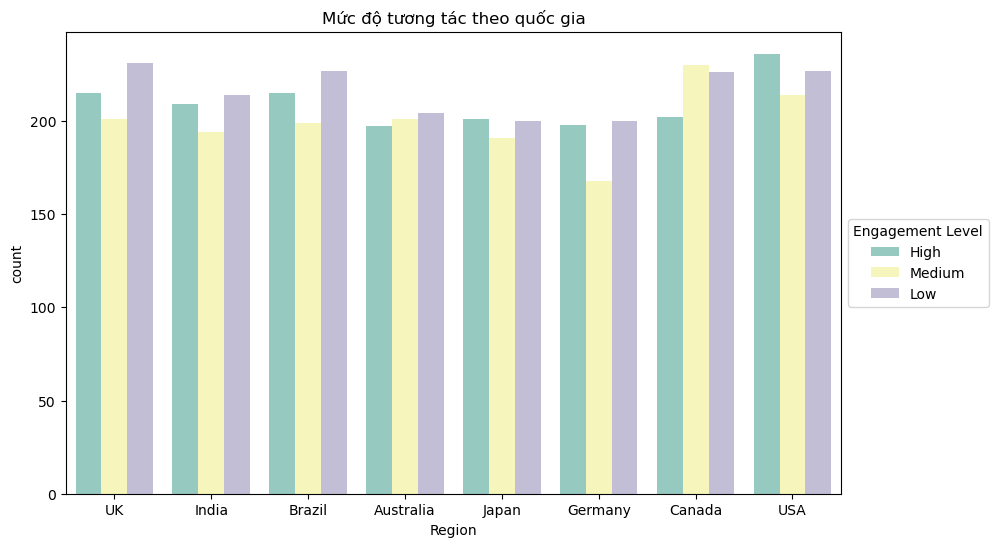

In [23]:
# Phân phối của mức độ tương tác dựa trên quốc gia
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Region', hue = 'Engagement_Level', palette = 'Set3')
plt.legend(title = 'Engagement Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Mức độ tương tác theo quốc gia')
plt.show()

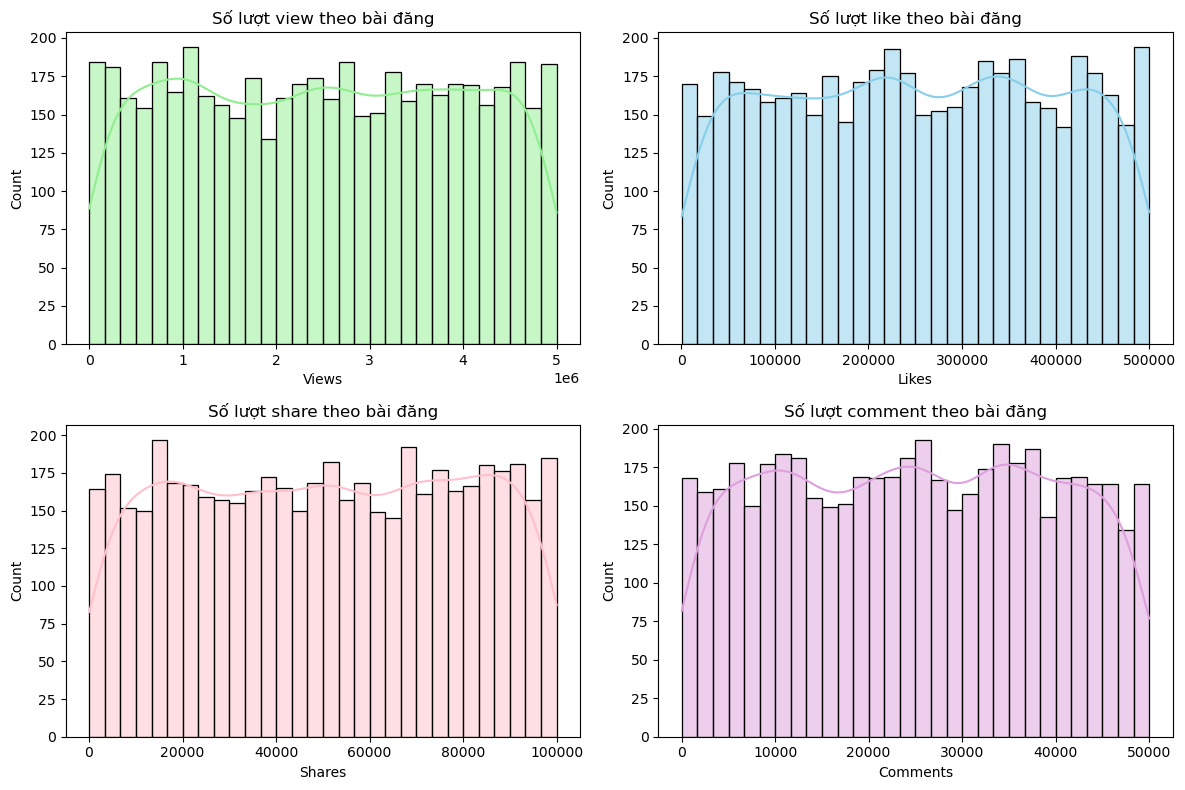

In [24]:
# Phân phối các chỉ số tương tác
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['Views'], bins = 30, ax = axes[0,0], kde = True, color = 'Lightgreen')
axes[0, 0].set_title('Số lượt view theo bài đăng')

sns.histplot(df['Likes'],bins=30, ax = axes[0,1], kde = True, color = 'Skyblue')
axes[0, 1].set_title('Số lượt like theo bài đăng')

sns.histplot(df['Shares'],bins=30, ax = axes[1,0], kde = True, color = 'Pink')
axes[1, 0].set_title('Số lượt share theo bài đăng')

sns.histplot(df['Comments'],bins=30, ax = axes[1,1], kde = True, color = 'Plum')
axes[1, 1].set_title('Số lượt comment theo bài đăng')

plt.tight_layout()
plt.show()


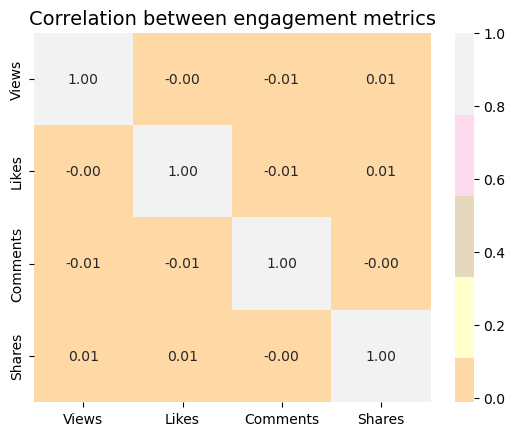

In [46]:
corr_matrix = df[['Views', 'Likes', 'Comments', 'Shares']].corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'Pastel1', center=0, fmt='.2f')
plt.title('Correlation between engagement metrics', fontsize=14)
plt.show()

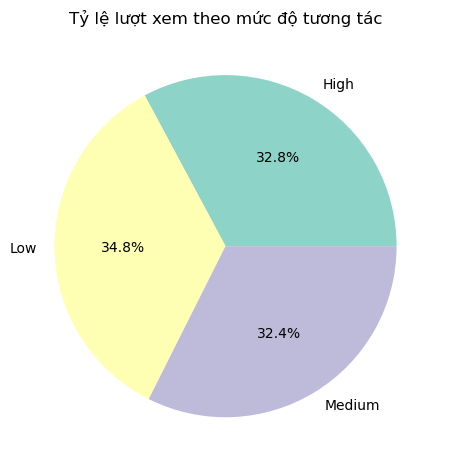

In [26]:
views_by_engagement = df.groupby("Engagement_Level")["Views"].sum()

# Vẽ biểu đồ tròn
colors = sns.color_palette("Set3")[:4] 
views_by_engagement.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title("Tỷ lệ lượt xem theo mức độ tương tác")
plt.ylabel("")
plt.tight_layout()
plt.show()

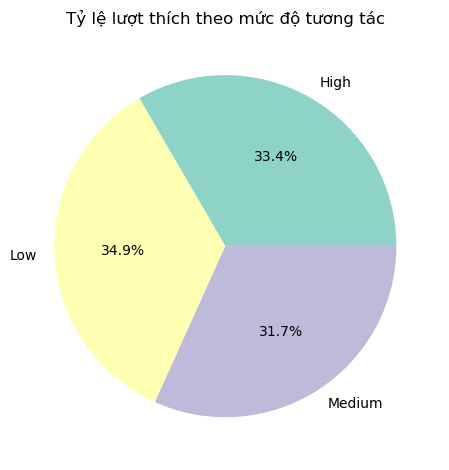

In [27]:
# Phân phối lượt thích theo mức độ tương tác
views_by_engagement = df.groupby("Engagement_Level")["Likes"].sum()

# Vẽ biểu đồ tròn
colors = sns.color_palette("Set3")[:4] 
views_by_engagement.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title("Tỷ lệ lượt thích theo mức độ tương tác")
plt.ylabel("")
plt.tight_layout()
plt.show()

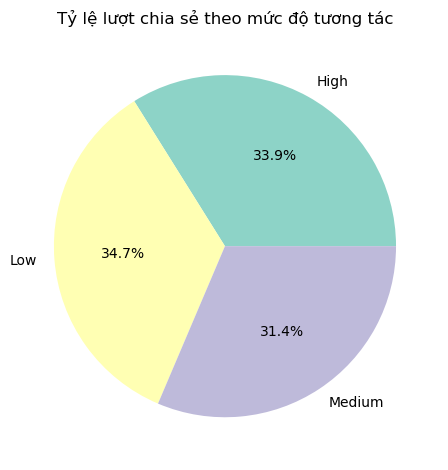

In [28]:
# Phân phối lượt chia sẽ theo mức độ tương tác
views_by_engagement = df.groupby("Engagement_Level")["Shares"].sum()

# Vẽ biểu đồ tròn
colors = sns.color_palette("Set3")[:4] 
views_by_engagement.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title("Tỷ lệ lượt chia sẻ theo mức độ tương tác")
plt.ylabel("")
plt.tight_layout()
plt.show()

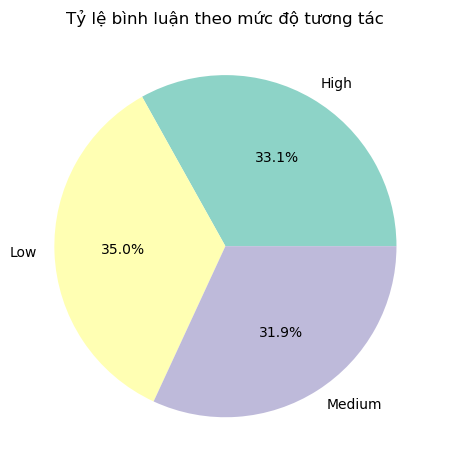

In [29]:
# Phân phối bình luận theo mức độ tương tác
views_by_engagement = df.groupby("Engagement_Level")["Comments"].sum()

# Vẽ biểu đồ tròn
colors = sns.color_palette("Set3")[:4] 
views_by_engagement.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title("Tỷ lệ bình luận theo mức độ tương tác")
plt.ylabel("")
plt.tight_layout()
plt.show()

Feature engineering

In [30]:
#Tạo biến mới
df['total_engagement'] = df['Likes'] + df['Shares'] + df['Comments']
df['engagement_rate'] = df['total_engagement']/df['Views']
numerical_features = ['Views', 'Likes', 'Shares', 'Comments']

In [31]:
q1 = df['engagement_rate'].quantile(0.33)  
q2 = df['engagement_rate'].quantile(0.66) 
def label_engagement(rate):
    if rate < q1:
        return 'Low'
    elif rate < q2:
        return 'Medium'
    else:
        return 'High'

# Gán nhãn theo engagement_rate
df['Engagement_Level_New'] = df['engagement_rate'].apply(label_engagement)

In [32]:
print(df)

       Platform     Hashtag Content_Type     Region    Views   Likes  Shares  \
0        TikTok  #Challenge        Video         UK  4163464  339431   53135   
1     Instagram  #Education       Shorts      India  4155940  215240   65860   
2       Twitter  #Challenge        Video     Brazil  3666211  327143   39423   
3       YouTube  #Education       Shorts  Australia   917951  127125   11687   
4        TikTok      #Dance         Post     Brazil    64866  171361   69581   
...         ...         ...          ...        ...      ...     ...     ...   
4995    YouTube  #Education        Video      Japan  4258236  381509   59209   
4996  Instagram  #Education        Video         UK  4841525  166266   54841   
4997    YouTube    #Fashion       Shorts        USA  2004080   32401   75229   
4998  Instagram     #Gaming       Shorts     Canada  2221665   46996   12954   
4999  Instagram    #Fashion         Reel      Japan  2224007   72744   29945   

      Comments Engagement_Level  total_

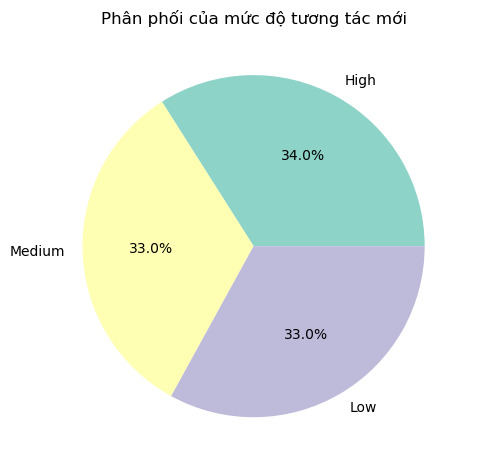

In [33]:
# Phân phối mức độ tương tác mới
Engagement_Level_counts = df['Engagement_Level_New'].value_counts()

colors = sns.color_palette("Set3")[:4] 
plt.pie(Engagement_Level_counts, labels = Engagement_Level_counts.index, autopct = '%1.1f%%', colors = colors)
plt.title('Phân phối của mức độ tương tác mới')
plt.tight_layout()
plt.show()

In [34]:
# Mã hóa biến phân loại 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Engagement_Level'] = label_encoder.fit_transform(df['Engagement_Level'])
df['Engagement_Level_New'] = label_encoder.fit_transform(df['Engagement_Level_New'])

In [35]:
corr_spearman = df['Engagement_Level'].corr(df['Engagement_Level_New'], method = 'spearman')
print(f'Spearman correlation: {corr_spearman}')

Spearman correlation: 0.007121294756277159


Hệ số tương quan Spearman giữa mức độ tương tác gốc và chỉ số tương tác mới xây dựng là 0.007 cho thấy gần như không tồn tại mối quan hệ tuyến tính nào giữa hai chỉ số này. Trong khi mức độ tương tác cũ không cho thấy tiêu chí phân loại và thiếu khách quan, mức độ tương tác mới sẽ cho thấy một góc nhìn khác khi là sự kết hợp của các biến đánh giá tương tác (Views, Likes, Shares, Comments)

In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [37]:
# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [38]:
print('\n Dữ liệu sau khi Feature Engineering')
print(df[numerical_features])


 Dữ liệu sau khi Feature Engineering
         Views     Likes    Shares  Comments
0     1.143937  0.609387  0.089991 -0.388039
1     1.138781 -0.251048  0.527826  0.164573
2     0.803200  0.524252 -0.381805  0.793569
3    -1.080016 -0.861537 -1.336130  0.834387
4    -1.664584 -0.555056  0.655856 -1.296107
...        ...       ...       ...       ...
4995  1.208879  0.900917  0.298982 -1.415269
4996  1.608571 -0.590355  0.148690 -1.404207
4997 -0.335758 -1.517815  0.850189  0.629179
4998 -0.186660 -1.416696 -1.292536  1.256284
4999 -0.185055 -1.238306 -0.707919  1.504760

[5000 rows x 4 columns]


Model Training

In [39]:
X = df[numerical_features]
y = df['Engagement_Level_New']

In [40]:
#Chia dữ liệu thành tập train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import auc, roc_auc_score

In [42]:
# Xây dựng và đánh giá mô hình
rf_model = RandomForestClassifier(max_depth=10,n_estimators=100, random_state=42, class_weight = 'balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score (Random Forest):", roc_auc_score(y_test, y_proba_rf, multi_class='ovr', average='weighted'))


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       361
           1       0.97      0.98      0.97       329
           2       0.96      0.95      0.95       310

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

ROC-AUC Score (Random Forest): 0.9979956860727784


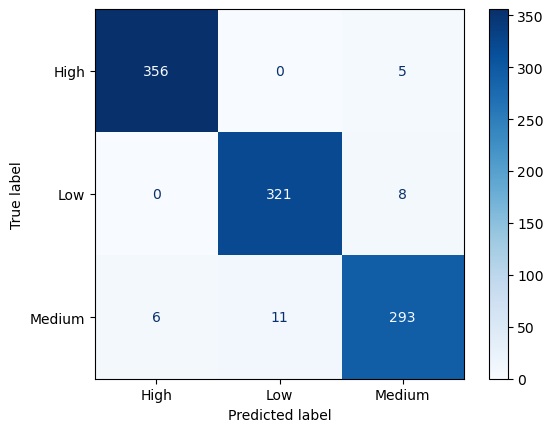

In [43]:
# Ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=label_encoder.classes_)
disp.plot(cmap = plt.cm.Blues)